In [1]:
# from duckduckgo_search import images
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    ddgs = DDGS()
    print(f"Searching for '{term}'")
    return L(ddgs.images(term, max_results=max_images)).itemgot('image')

# Create a model to distinguish sports and sedan cars

In [2]:
urls = search_images('sports car photos', max_images=1)
urls[0]

Searching for 'sports car photos'


'https://wallpaperaccess.com/full/11205.jpg'

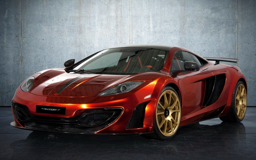

In [3]:
from fastdownload import download_url
dest = 'sports_car.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'sedan car photos'


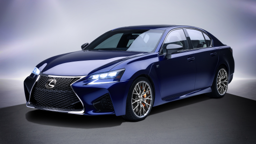

In [4]:
download_url(search_images('sedan car photos', max_images=1)[0], 'sedan.jpg', show_progress=False)
Image.open('sedan.jpg').to_thumb(256,256)

### Download images of sports cars and sedan cars

In [5]:
searches = 'sports car','sedan car'
path = Path('sports_car_or_not')
# from time import sleep

# for o in searches:
#     dest = (path/o)
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=search_images(f'{o} photo'))
#     sleep(10)  # Pause between searches to avoid over-loading server
#     download_images(dest, urls=search_images(f'{o} sun photo'))
#     sleep(10)
#     download_images(dest, urls=search_images(f'{o} shade photo'))
#     sleep(10)
#     resize_images(path/o, max_size=400, dest=path/o)

Delete failed images

In [6]:
# failed = verify_images(get_image_files(path))
# failed.map(Path.unlink)
# len(failed)

### Create a datablock

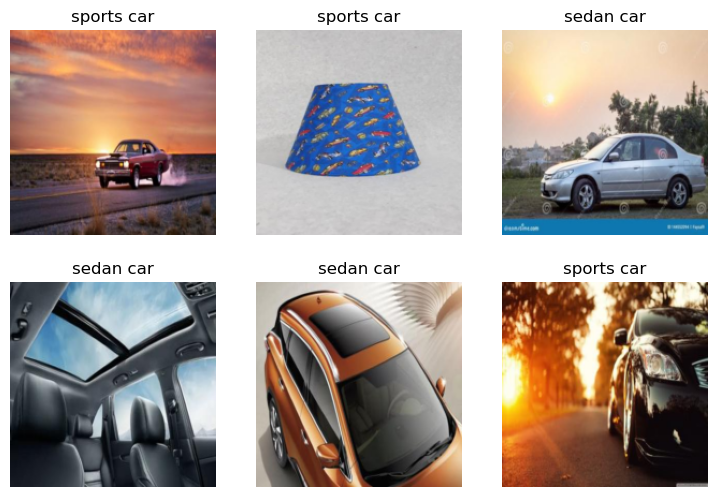

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

## Create a model based of a pretrained resnet50 model and fine tune it

In [8]:
learn = vision_learner(dls = dls, arch=models.resnet50, metrics=error_rate)
learn.fine_tune(100)

epoch,train_loss,valid_loss,error_rate,time
0,0.945488,0.676259,0.265625,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.394554,0.424046,0.187500,00:07
1,0.248176,0.296154,0.125000,00:05
2,0.177654,0.263440,0.093750,00:05
3,0.142307,0.222064,0.093750,00:05
4,0.114603,0.252451,0.078125,00:05
5,0.098994,0.230419,0.078125,00:05
6,0.088255,0.175000,0.062500,00:05
7,0.078167,0.162650,0.078125,00:05
8,0.068483,0.227397,0.078125,00:05
9,0.065754,0.192233,0.046875,00:05


Make some predicitons

In [9]:
is_thing,_,probs = learn.predict(PILImage.create('sports_car.jpg'))
print(f"This is a: {is_thing}.")
print(f"Probability it's a {is_thing}: {probs[int(_)]}")

This is a: sports car.
Probability it's a sports car: 1.0


In [10]:
is_thing,_,probs = learn.predict(PILImage.create('sedan.jpg'))
print(f"This is a: {is_thing}.")
print(f"Probability it's a {is_thing}: {probs[int(_)]}")

This is a: sedan car.
Probability it's a sedan car: 1.0


Save the model

In [11]:
learn.save("model")

Path('models/model.pth')